In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import time

## Oppgave 7b)

In [10]:
#høyre side av differensiallikningen
def dydx(x, y):
    return y

def euler(f, y0, x0, x_slutt, dx):
    # f funksjonen som inneholder høyre side av diff lining, 
    # x0 
    # y0 
    # x_slutt
    # dx steg
    x = x0
    y = y0
    yl=[y]    
    xl=[x]
    X=np.arange(x0,x_slutt,dx)
    for i in X:
        y = y + dx*f(x,y)
        x = x + dx
        xl.append(x)
        yl.append(y)
    return y,xl,yl

x0=0
y0=1
y,xl0,yl0=euler(dydx,y0,x0,1.0,0.5)
print(y)
y,xl1,yl1=euler(dydx,y0,x0,1.0,0.1)
print(y)
y,xl2,yl2=euler(dydx,y0,x0,1.0,0.01)
print(y)
y,xl3,yl3=euler(dydx,y0,x0,1.0,0.001)
print(y)
y,xl4,yl4=euler(dydx,y0,x0,1.0,0.00001)
print(y)



2.25
2.5937424601
2.704813829421526
2.716923932235896
2.7182682371744953


In [11]:
# Definerer funksjonen som gir dX/dt 
def dXdt(X,t):
    g=9.81
    y=X[0] # tar y koordinaten og bruker egentlig ikke den...
    v=X[1] # henter farten v
    dydt=v # den deriverte av første element er farten
    dvdt=-g # den deriverte av farten er akselerasjon,
    return np.array([dydt,dvdt])

X0=np.array([3,12]) # 3m høyde , 12 m/s startfart
dt=0.1 # tidssteg
X1=X0+dt*dXdt(X0,0)
print(X1)

X2=X1+dt*dXdt(X1,0.1)
print(X2)

[ 4.2   11.019]
[ 5.3019 10.038 ]


In [17]:
dt=0.0001
t_liste=[0]
y_liste=[X0[0]]
v_liste=[X0[1]]
X=X0 
t=0.0
y=X0[0]
v=X0[1]
while v>0: # så lenge vi er på vei opp...
#while y>0:
    Xn=X+dt*dXdt(X,t)
    y=Xn[0] # henter ut posisjonen
    v=Xn[1] # henter ut farten
    t_liste.append(t)
    y_liste.append(y)
    v_liste.append(v)
    t=t+dt
    X=Xn
print(f"Etter {t:6.4f}s er farten negativ({X[1]:6.4f})") # Nå har vi akkurat passert toppunktet
print(f"Er på topp i intervallet {t-dt:6.4f} {t:6.4f} ") # Nå har vi akkurat passert toppunktet
print(f"Hyden er {X[0]:6.2f}m ") # Nå har vi akkurat passert toppunktet

Etter 1.2233s er farten negativ(-0.0006)
Er på topp i intervallet 1.2232 1.2233 
Hyden er  10.34m 


In [18]:
print(" fart før passering" ,v_liste[len(v_liste)-2])
print(" fart etter passering", v_liste[len(v_liste)-1])
print(" høyde før passering ",y_liste[len(y_liste)-2])
print(" høyde før passering ",y_liste[len(y_liste)-1])

 fart før passering 0.0004080000011283877
 fart etter passering -0.0005729999988716124
 høyde før passering  10.340049512401492
 høyde før passering  10.340049553201492


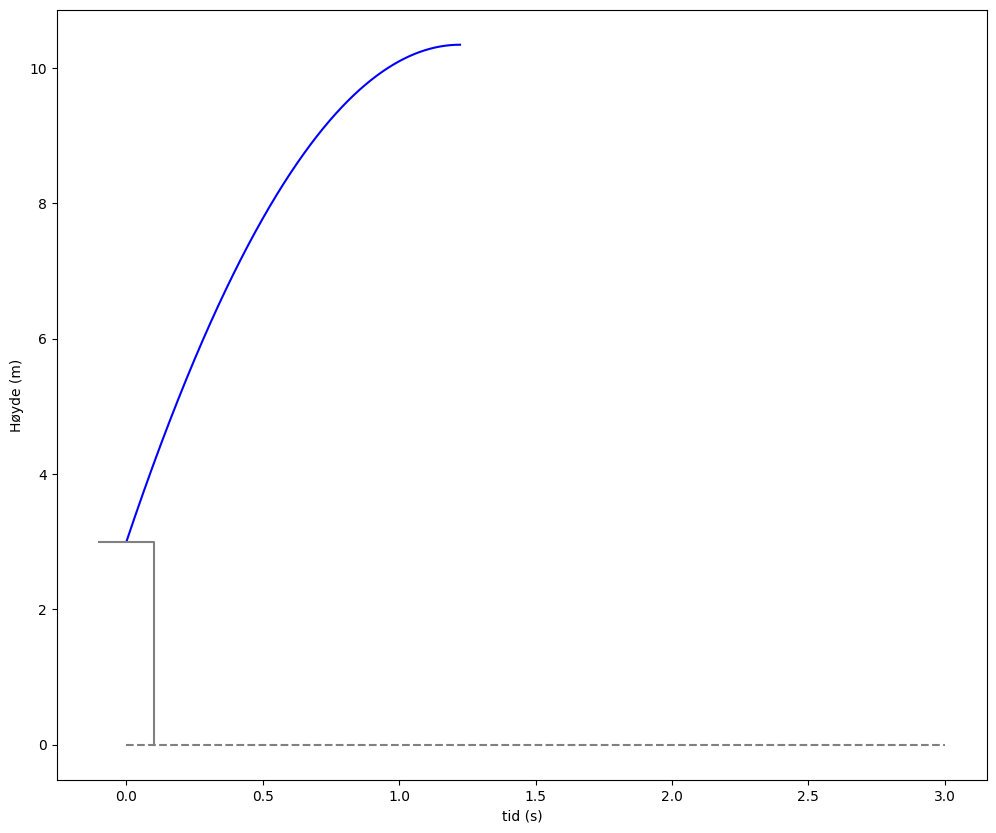

In [19]:
plt.figure(figsize = (12, 10))
plt.plot(t_liste,y_liste,color="blue")
plt.plot([0,3],[0,0],'--',color="gray")
plt.plot(np.array([-0.1,0.1,0.1]),[3,3,0],color="gray")
plt.xlabel("tid (s)")
plt.ylabel("Høyde (m)")
plt.show()